<a href="https://colab.research.google.com/github/Areej973/Bike-Store-Sales/blob/main/Bike_store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike store sales project

In [102]:
import pandas as pd
import numpy as np

path = '/content/sales_data.csv'
sales = pd.read_csv(path)

## First look at our data

Analyze what columns we have, what type they are and what data is on them.

In [103]:
sales.shape

(5000, 16)

In [104]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [105]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [106]:
sales.tail(3)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


## Fixing column types

.Cast Date to datetime.

.Cast Customer_Gender, Country, State, Product_Category and Sub_Category to category.

In [107]:
sales['Date'] = pd.to_datetime(sales['Date'])

for col in ['Customer_Gender','Country','State','Product_Category','Sub_Category']:
  sales[col]= sales[col].astype('category')


sales.dtypes

,0
Date,datetime64[ns]
Day,int64
Month,object
Year,int64
Customer_Age,int64
Customer_Gender,category
Country,category
State,category
Product_Category,category
Sub_Category,category


## Get a summary of the main statistics of the whole data##

In [108]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2014-11-24 09:47:13.920000,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
min,2011-01-03 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,2013-12-27 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,2014-07-02 12:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,2016-01-07 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000
std,NaN,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588


##What's the mean of Customers_Age?

In [109]:
sales['Customer_Age'].mean()

35.9338

###Go ahead and show a density (KDE) and a box plot with the Customer_Age data:

<Axes: ylabel='Density'>

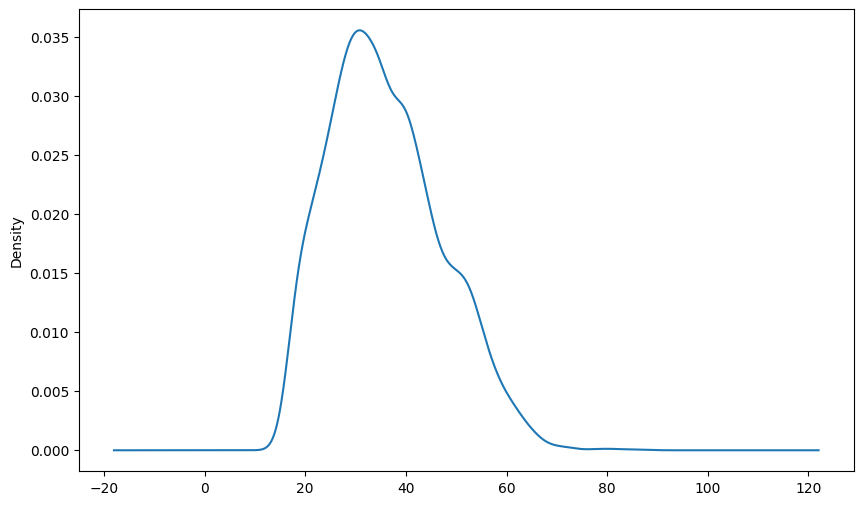

In [110]:
sales['Customer_Age'].plot(kind='kde', figsize=(10,6))

<Axes: >

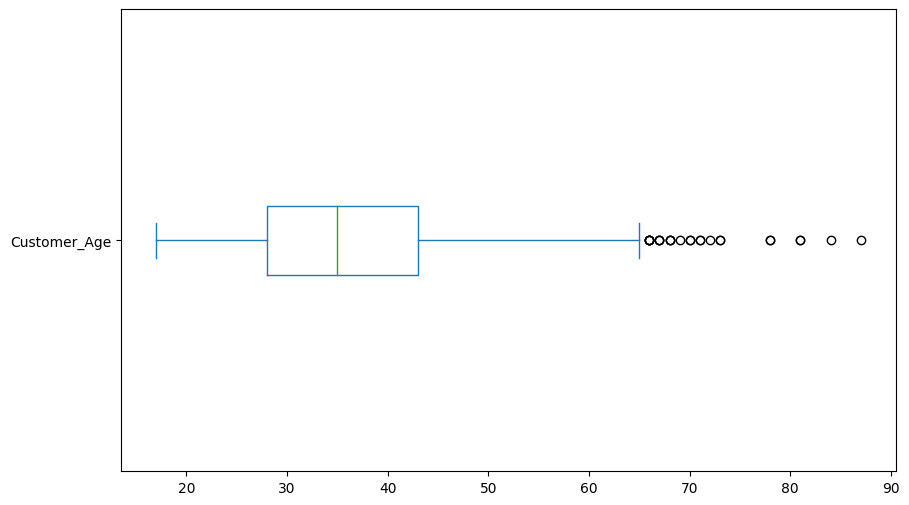

In [111]:
sales['Customer_Age'].plot(kind='box',vert= False,figsize=(10,6))

## What's the mean of Order_Quantity?

In [112]:
sales['Order_Quantity'].mean()

11.8204

###Go ahead and show a histogram and a box plot with the Order_Quantity data:

<Axes: ylabel='Frequency'>

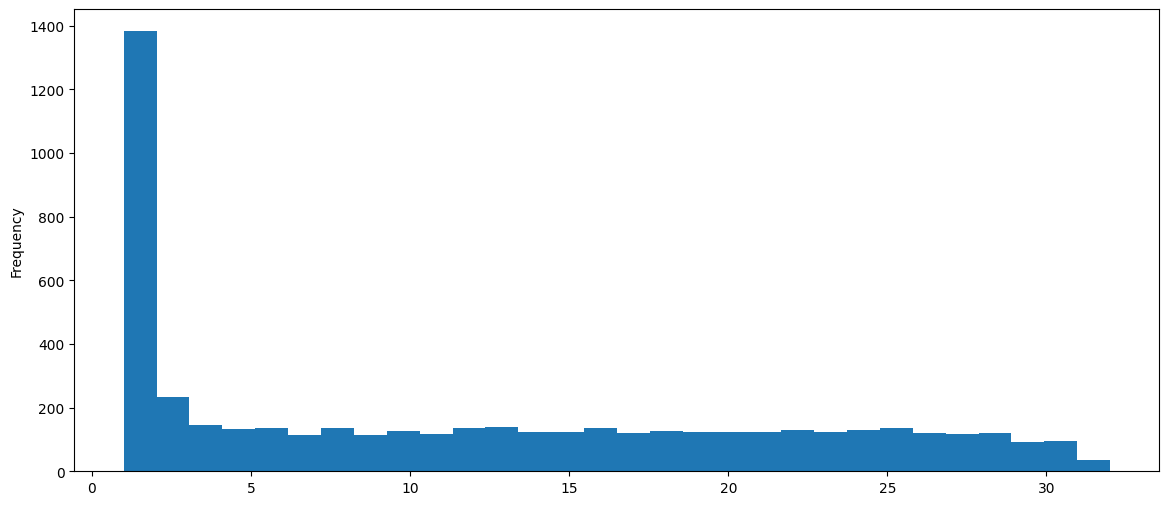

In [113]:
sales['Order_Quantity'].plot(kind='hist',bins=30,figsize=(14,6))

<Axes: >

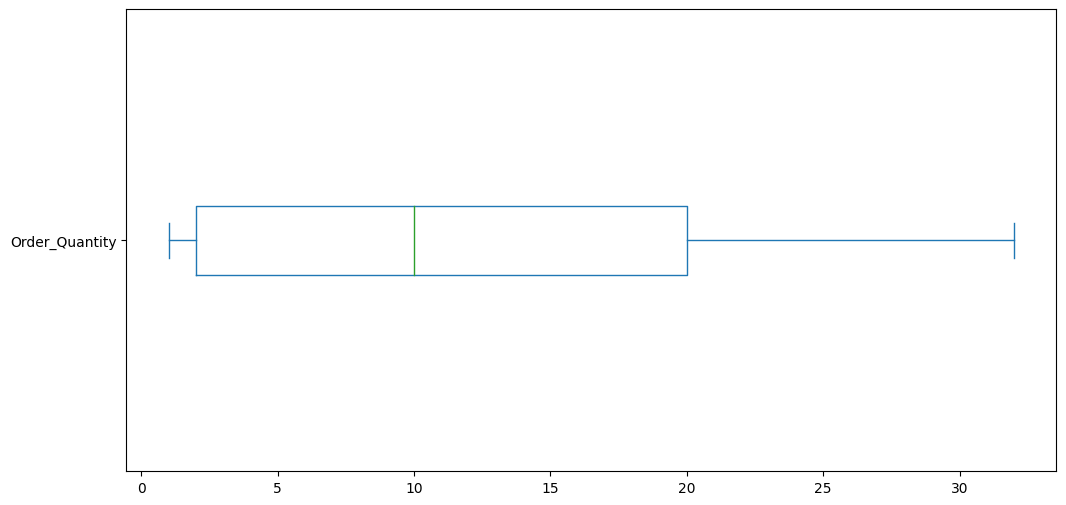

In [114]:
sales['Order_Quantity'].plot(kind='box',vert= False,figsize=(12,6))

##In which countries were sales made?

In [115]:
sales['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom',
                         'United States']

## Sort sales by year

Older sales should be at the bottom.

In [116]:
sales.sort_values(['Year'],ascending=False,inplace=True)
sales.head(3)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
3962,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
3902,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5,46,78
3886,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,268,437


## Reset the current index

Don't keep the old index.

In [117]:
sales.reset_index(drop=True,inplace=True)
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,35,533,858
1,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5,46,78
2,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,268,437
3,2016-01-18,18,January,2016,26,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,4
4,2016-06-03,3,June,2016,44,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",18,13,35,390,624


##How many sales per year do we have?

In [118]:
sales['Year'].value_counts()

,count
Year,
2014,1327
2016,1272
2015,1123
2013,1040
2011,126
2012,112


###Go ahead and show a pie plot and a bar plot with the previous data:

<Axes: ylabel='count'>

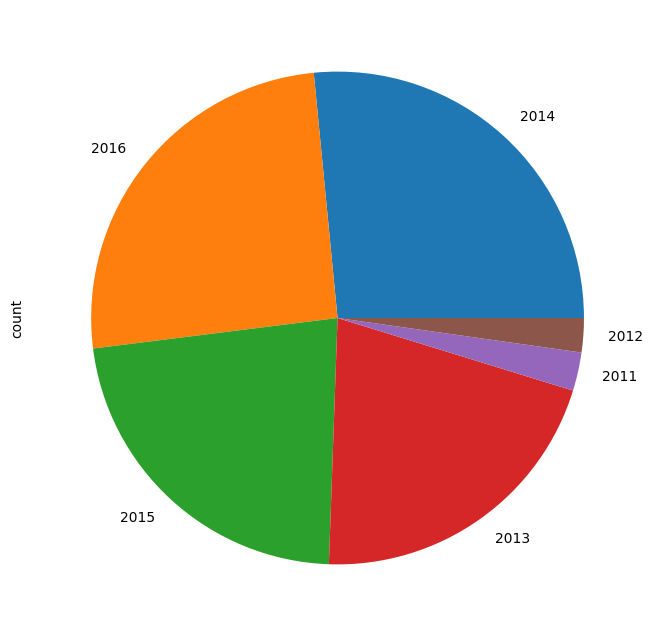

In [119]:
sales['Year'].value_counts().plot(kind='pie',figsize=(8,8))

<Axes: xlabel='Year'>

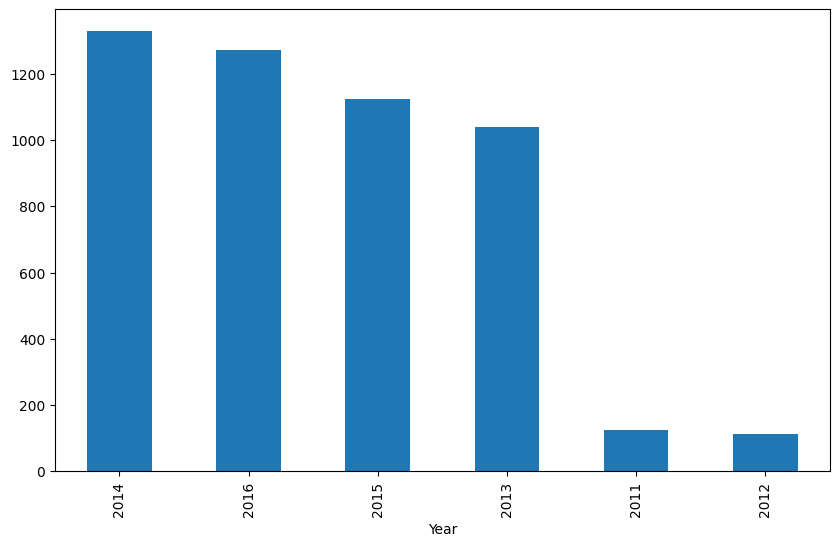

In [120]:
sales['Year'].value_counts().plot(kind='bar',figsize=(10,6))

##Create a new Cost column

This column should be:

cost= unit_cost*order_quantity


In [121]:
sales['Cost']=sales['Unit_Cost']*sales['Order_Quantity']
sales['Cost']

,Cost
0,325
1,32
2,169
3,2
4,234
...,...
4995,344
4996,688
4997,1266
4998,1266


##Create a new YearMonth column

This new YearMonth column should be the concatenation of Year and Month columns, separated by a '-'.

In [122]:
sales['YearMonth']=sales['Year'].astype('str')+'-'+sales['Month'].astype('str')
sales['YearMonth']

,YearMonth
0,2016-July
1,2016-May
2,2016-March
3,2016-January
4,2016-June
...,...
4995,2011-March
4996,2011-December
4997,2011-July
4998,2011-December


##How did sales evolve through the years?

Count how many sales we have per YearMonth.

In [123]:
sales['YearMonth'].value_counts()

,count
YearMonth,
2015-December,232
2016-April,218
2014-June,215
2013-December,215
2016-May,214
...,...
2012-December,7
2012-February,6
2011-February,6


###Go ahead and show a bar plot with the previous data:

<Axes: xlabel='YearMonth'>

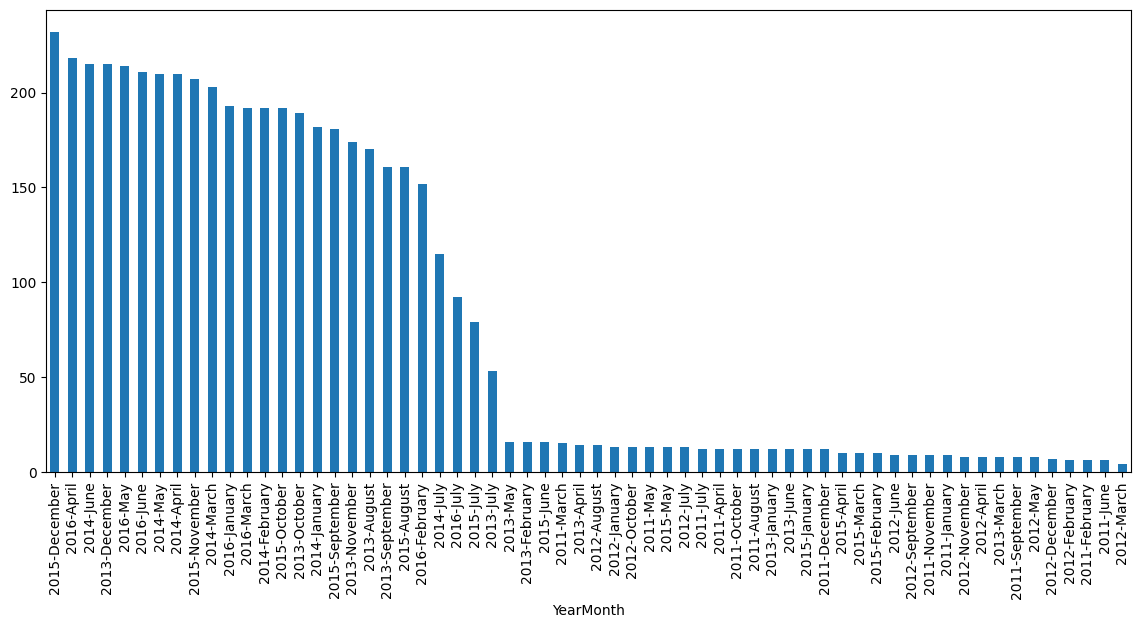

In [124]:
sales['YearMonth'].value_counts().plot(kind='bar',figsize=(14,6))

##Which country has the most sales quantity of sales?

In [125]:
sales['Country'].value_counts().head(1)

,count
Country,
United States,1700


###Go ahead and show a bar plot of the sales per country:

<Axes: xlabel='Country'>

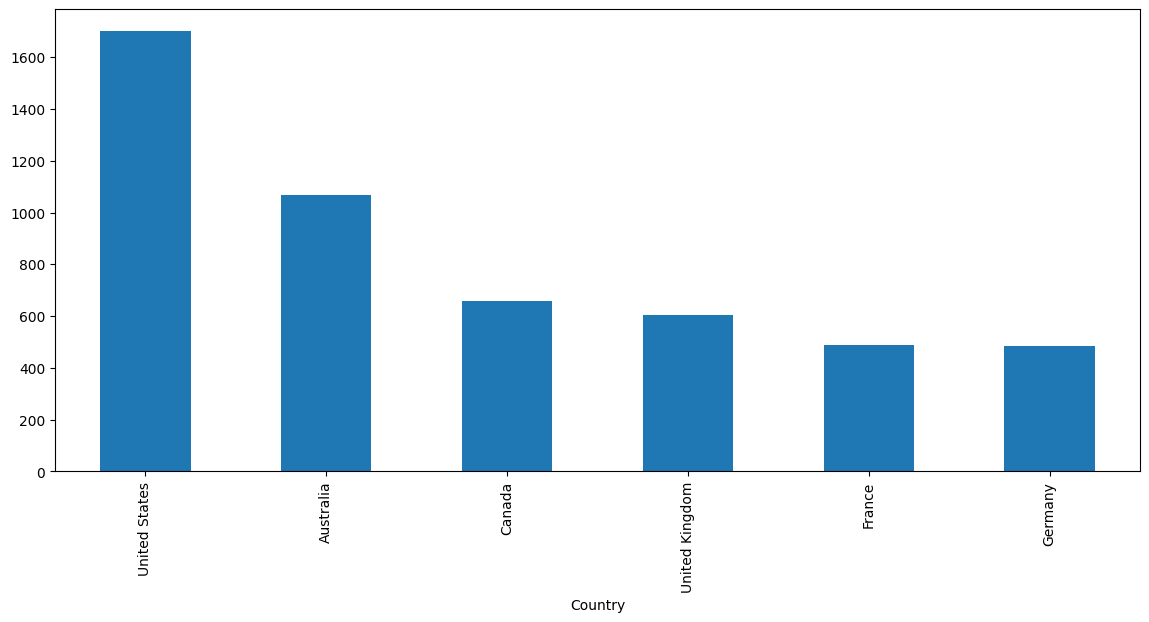

In [126]:
sales['Country'].value_counts().plot(kind='bar',figsize=(14,6))

##Get a list of every product sold

In [127]:
sales['Product'].unique()

array(['Sport-100 Helmet, Red', 'Water Bottle - 30 oz.',
       'Sport-100 Helmet, Blue', 'Sport-100 Helmet, Black',
       'Patch Kit/8 Patches', 'Hitch Rack - 4-Bike', 'Road Tire Tube',
       'ML Mountain Tire', 'Mountain-400-W Silver, 42',
       'Touring Tire Tube', 'Fender Set - Mountain',
       'Touring-3000 Blue, 62', 'AWC Logo Cap',
       'Long-Sleeve Logo Jersey, L', 'Bike Wash - Dissolver',
       'Mountain-200 Silver, 46', 'Road-150 Red, 52', 'LL Mountain Tire',
       'Road-150 Red, 44', 'Road Bottle Cage', 'LL Road Tire',
       'Touring-1000 Yellow, 60', 'HL Road Tire', 'Mountain Tire Tube',
       'Touring-3000 Blue, 44', 'Short-Sleeve Classic Jersey, L',
       'Touring-1000 Blue, 50', 'HL Mountain Tire',
       'Half-Finger Gloves, L', 'Half-Finger Gloves, M',
       'Racing Socks, M', 'Road-650 Red, 52', 'ML Road Tire',
       'Mountain-400-W Silver, 40', 'Mountain-200 Silver, 42',
       'Long-Sleeve Logo Jersey, XL', 'Touring-1000 Yellow, 54',
       'Hydration P

###Create a bar plot showing the 10 most sold products (best sellers):

<Axes: xlabel='Product'>

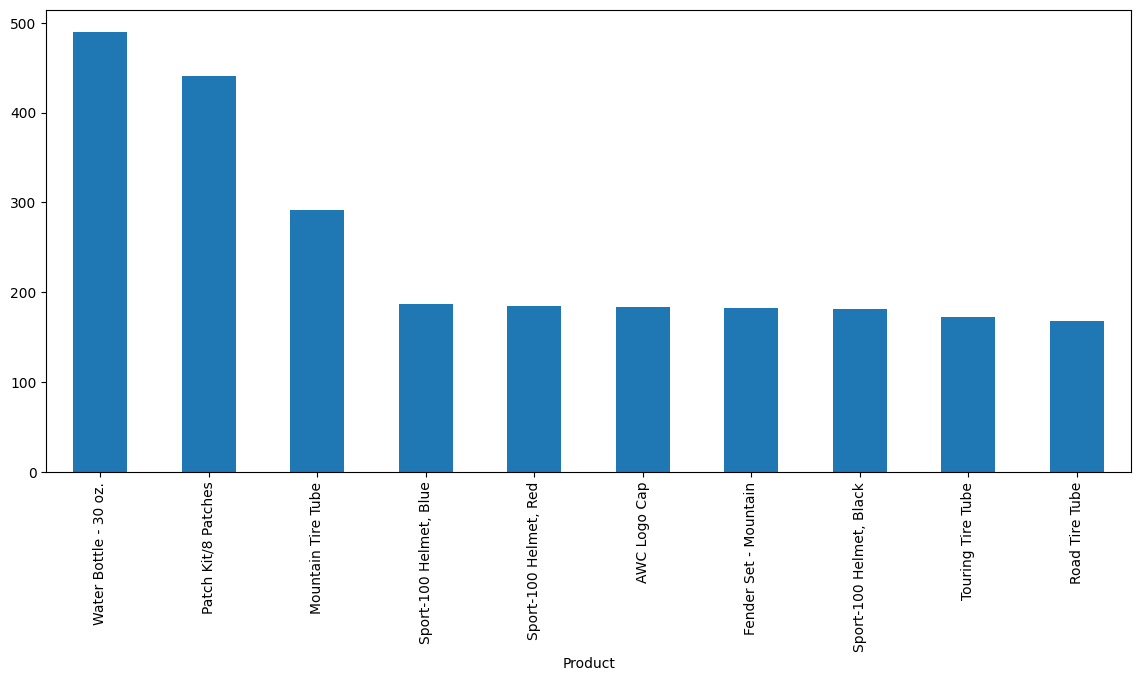

In [128]:
sales['Product'].value_counts().head(10).plot(kind='bar',figsize=(14,6))

##Can you see any relationship between Unit_Cost and Unit_Price?

Show a scatter plot between both columns.

<Axes: title={'center': 'relation between Unit Cost and Unit Price'}, xlabel='Unit_Cost', ylabel='Unit_Price'>

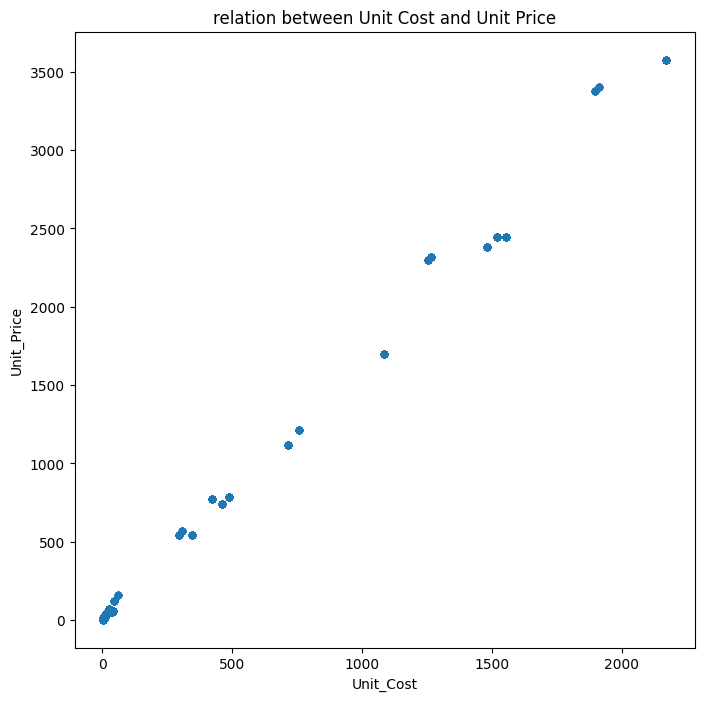

In [129]:
sales.plot(kind='scatter',x='Unit_Cost',y='Unit_Price',title='relation between Unit Cost and Unit Price',figsize=(8,8))

##Can you see any relationship between Order_Quantity and Profit?

Show a scatter plot between both columns.

<Axes: title={'center': 'relationship between Order Quantity and Profit'}, xlabel='Order_Quantity', ylabel='Profit'>

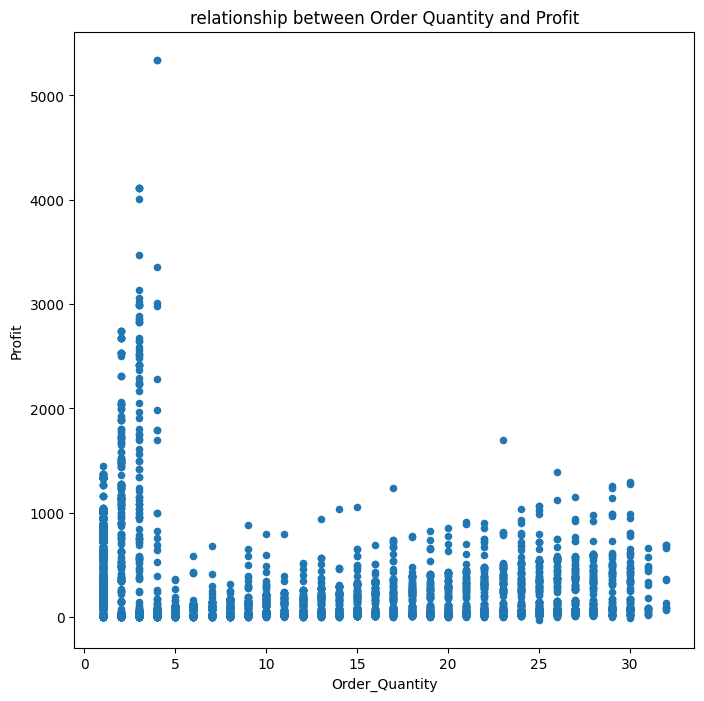

In [130]:
sales.plot(kind='scatter',x='Order_Quantity',y='Profit',title='relationship between Order Quantity and Profit',figsize=(8,8))

##Can you see any relationship between Profit per Country?

Show a grouped box plot per country with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

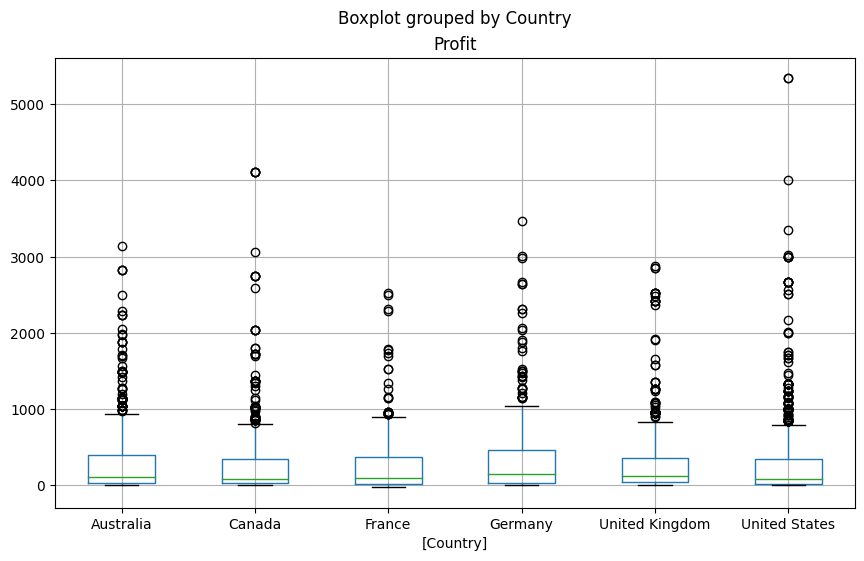

In [131]:
sales[['Profit','Country']].boxplot(by='Country',figsize=(10,6))

##Can you see any relationship between the Customer_Age per Country?

Show a grouped box plot per country with the customer age values.

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

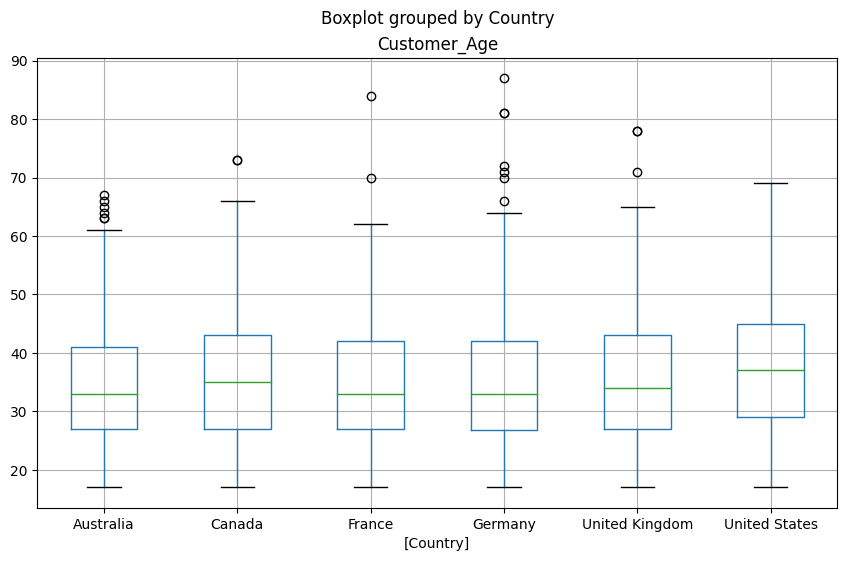

In [132]:
sales[['Customer_Age','Country']].boxplot(by='Country',figsize=(10,6))

##Increase 50 U$S revenue to every sale

In [133]:
sales['Revenue']=sales['Revenue']+50
sales['Revenue']

,Revenue
0,908
1,128
2,487
3,54
4,674
...,...
4995,493
4996,1119
4997,2324
4998,1883


##How many orders were made in Canada or France?

In [134]:
sales.loc[(sales['Country']=='Canada')
|(sales['Country']=='France')].shape[0]

1146

##How many Bike Racks orders were made from Canada?

In [135]:
sales.loc[(sales['Country']=='Canada')
& (sales['Sub_Category']=='Bike Racks')].shape[0]

3

##How many orders were made in each region (state) of France?

In [136]:
France_states = sales.loc[sales['Country']=='France','State'].value_counts()
France_states

,count
State,
Seine (Paris),101
Seine Saint Denis,87
Nord,76
Yveline,48
Hauts de Seine,41
Essonne,40
Seine et Marne,16
Moselle,16
Loiret,13


###Go ahead and show a bar plot with the results:

<Axes: title={'center': 'France orders per state'}, xlabel='State'>

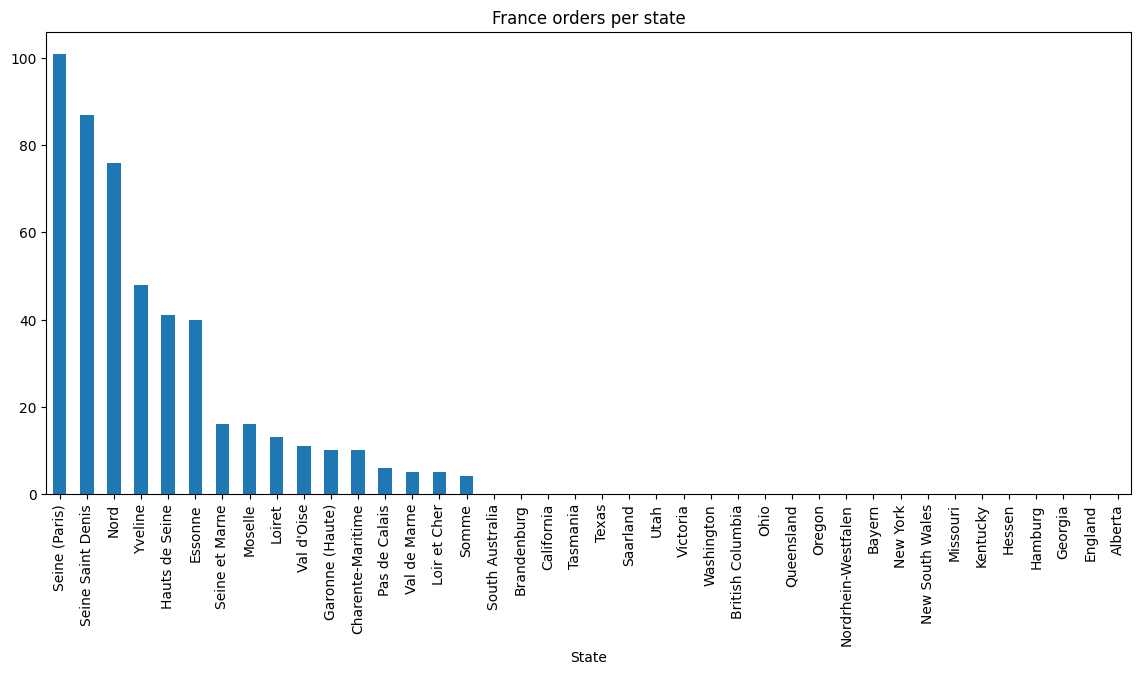

In [137]:
France_states.plot(kind='bar',
                   title='France orders per state',
                   figsize=(14,6))

##How many sales were made per category?

In [138]:
sales['Product_Category'].value_counts()

,count
Product_Category,
Accessories,3090
Bikes,1166
Clothing,744


###Go ahead and show a pie plot with the results:

<Axes: title={'center': 'Sales per Category'}, ylabel='count'>

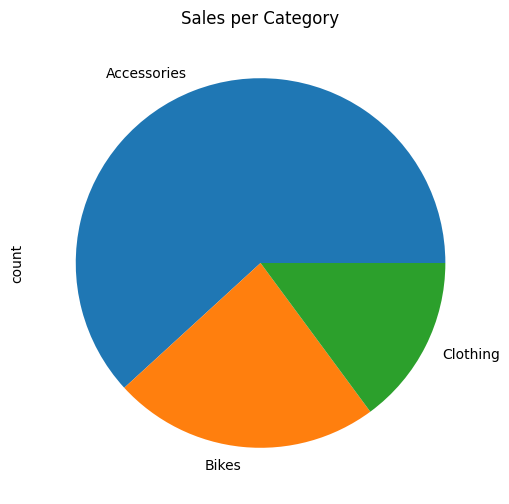

In [139]:
sales['Product_Category'].value_counts().plot(kind='pie',
                                             title='Sales per Category',
                                             figsize=(14,6))

##How many orders were made per accessory sub-categories?

In [140]:
accessory=sales.loc[sales['Product_Category']=='Accessories','Sub_Category'].value_counts()
accessory

,count
Sub_Category,
Tires and Tubes,1458
Bottles and Cages,719
Helmets,553
Fenders,183
Cleaners,78
Hydration Packs,64
Bike Racks,26
Bike Stands,9
Gloves,0


###Go ahead and show a bar plot with the results

<Axes: title={'center': 'order made per accessory sub categori'}, xlabel='Sub_Category'>

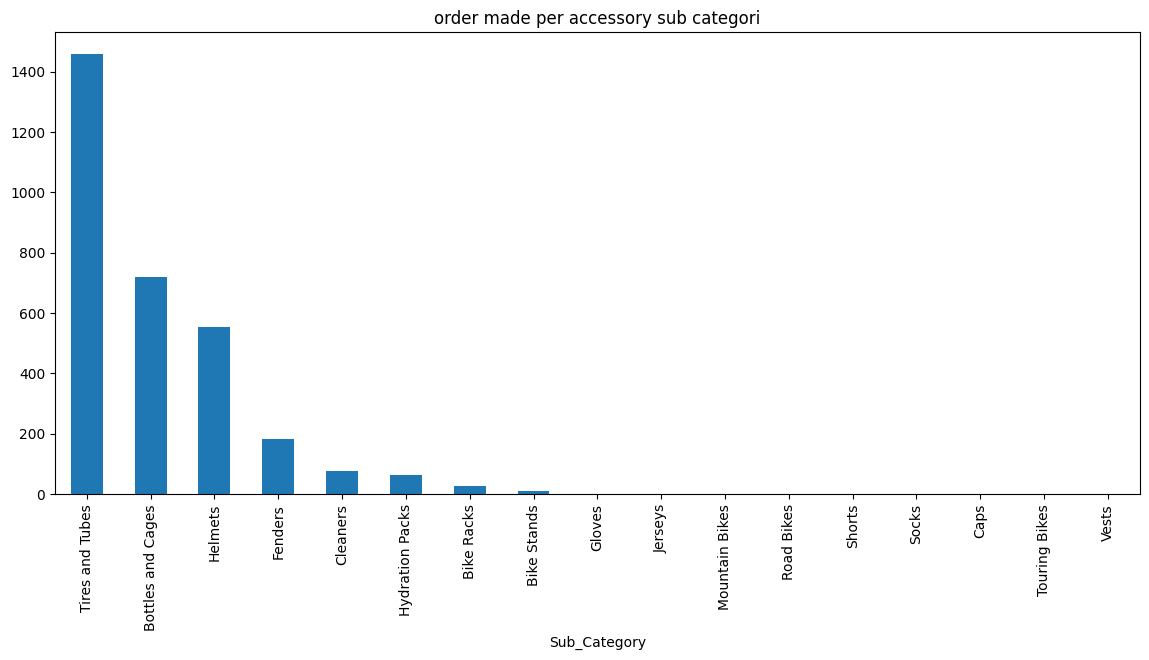

In [141]:
accessory.plot(kind='bar',
               title='order made per accessory sub categori',
               figsize=(14,6))

##How many orders were made per bike sub-categories?


In [142]:
bike=sales.loc[sales['Product_Category']=='Bikes','Sub_Category'].value_counts()
bike

,count
Sub_Category,
Road Bikes,600
Mountain Bikes,391
Touring Bikes,175
Bike Racks,0
Jerseys,0
Tires and Tubes,0
Socks,0
Shorts,0
Hydration Packs,0


###Go ahead and show a pie plot with the results:

<Axes: ylabel='count'>

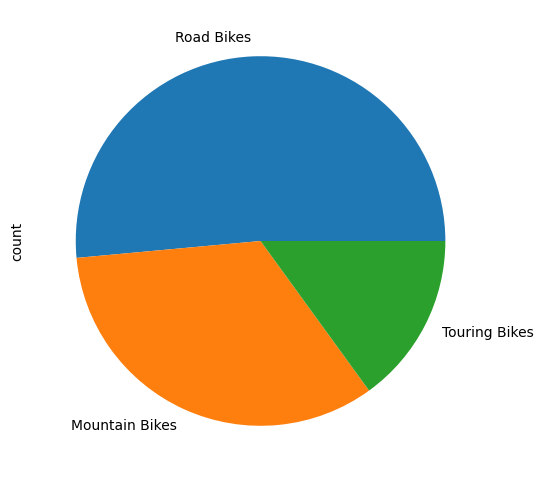

In [143]:
bike.plot(kind='pie',figsize=(6,6))

##Which gender has the most amount of sales?

<Axes: xlabel='Customer_Gender'>

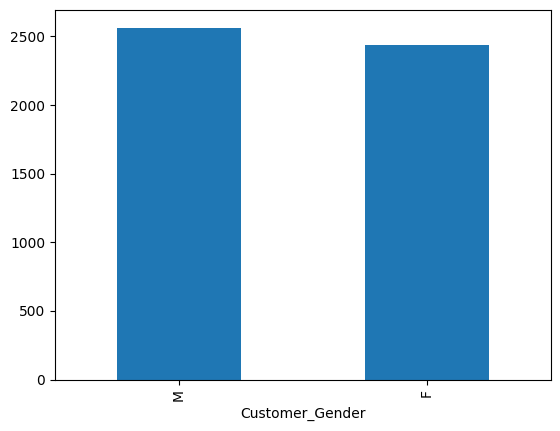

In [144]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

##How many sales with more than 500 in Revenue were made by men?

In [145]:
sales.loc[(sales['Customer_Gender']=='M')&(sales['Revenue']==500)]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
985,2016-03-20,20,March,2016,51,M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",13,13,35,281,500,169,2016-March


##Get the top-5 sales with the highest revenue

In [146]:
sales.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January
4986,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011-March
4959,2011-12-29,29,December,2011,25,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2011-December
1689,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2015-December
678,2016-01-28,28,January,2016,34,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2016-January


##Get the sale with the highest revenue

In [147]:
sales.sort_values(['Revenue'],ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January


##What is the mean Order_Quantity of orders with more than 10K in revenue?

In [148]:
re= sales['Revenue']>10000
sales.loc[re,'Order_Quantity'].mean()

3.25

##What is the mean Order_Quantity of orders with less than 10K in revenue?


In [149]:
re=sales['Revenue']<10000
sales.loc[re,'Order_Quantity'].mean()

11.834134615384615

##How many orders were made in May of 2016?

In [152]:
order=(sales['Year']==2016)&(sales['Month']=='May')
sales.loc[order].shape[0]

214

##How many orders were made between May and July of 2016?

In [153]:
order=(sales['Year']==2016)&(sales['Month'].isin(['May','June','July']))
sales.loc[order].shape[0]

517

###Show a grouped box plot per month with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

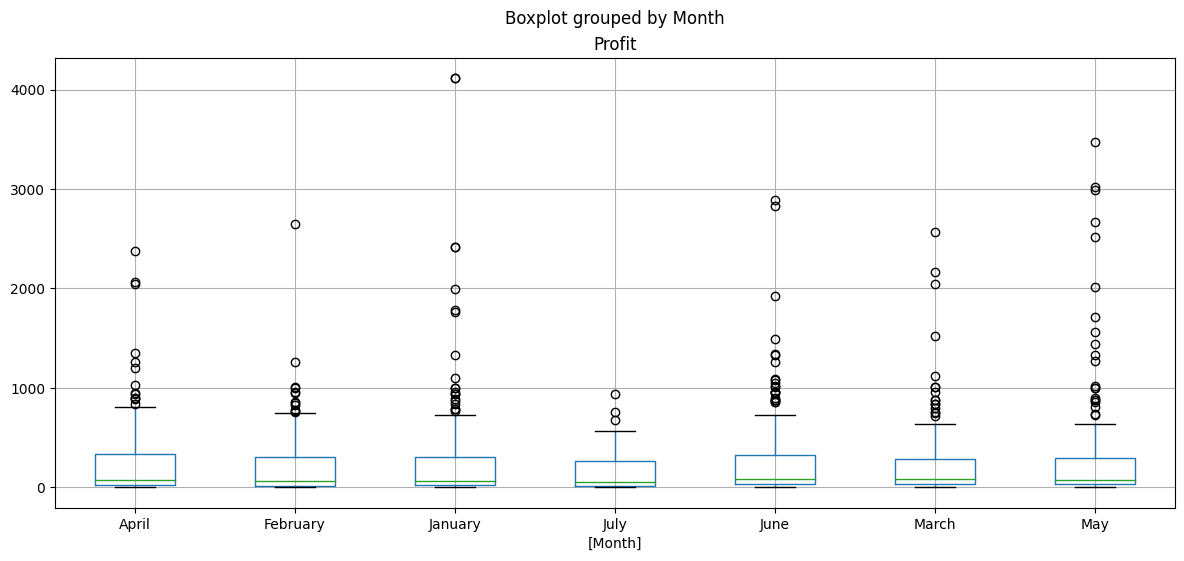

In [154]:
prof_2016=sales.loc[sales['Year']==2016,['Profit','Month']]
prof_2016.boxplot(by='Month',figsize=(14,6))

##Add 7.2% TAX on every sale Unit_Price within United States

In [155]:
sales.loc[sales['Country']=='United States','Unit_Price']*=1.072
sales.head()

<ipython-input-155-29b5d72f831e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  37.52     5.36   128.64  ... 3835.616 2618.896 2487.04 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales['Country']=='United States','Unit_Price']*=1.072


,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
0,2016-07-19,19,July,2016,37,F,United States,California,Accessories,Helmets,"Sport-100 Helmet, Red",25,13,37.52,533,908,325,2016-July
1,2016-05-20,20,May,2016,39,F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,16,2,5.36,46,128,32,2016-May
2,2016-03-01,1,March,2016,31,F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35.00,268,487,169,2016-March
3,2016-01-18,18,January,2016,26,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5.00,2,54,2,2016-January
4,2016-06-03,3,June,2016,44,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",18,13,35.00,390,674,234,2016-June


##Save Work

In [156]:
sales.to_csv('sales_update')